# Data Exploration & Cleaning

In [18]:
import pandas as pd
import numpy as np

# Importing the 4 dataframes containing all raw data
from extract_into_dfs import academy_csvs_df, talent_csvs_df, talent_jsons_df, talent_txts_df

## Academy CSV's

In [19]:
academy_csvs_df['name'].duplicated().sum()

# This equals 0, i.e. there are no duplicated names

0

In [20]:
# Checking for near duplicates
from fuzzywuzzy import fuzz

academy_csvs_df['Similarity to other names'] = academy_csvs_df['name'].apply(lambda x: fuzz.token_set_ratio(x, academy_csvs_df['name']))

academy_csvs_df[['name', 'Similarity to other names']].sort_values('Similarity to other names')

,name,Similarity to other names
111,MONA ORVISS,4
87,OMERO SHILL,4
21,VERNE FRANCESCUZZI,4
391,HORTEN KOOMAR,4
367,LILLY ANDREASEN,4
...,...,...
3,YOLANDA FOSSE,100
2,GUSTAF LUDE,100
1,SIMON MURREY,100
395,THOM DERWIN,100


<Axes: xlabel='Similarity to other names', ylabel='Count'>

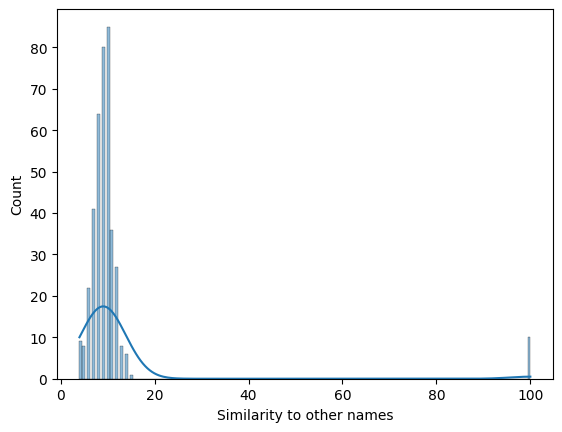

In [21]:
# Plotting the result of this using seaborn

import seaborn as sns

sns.histplot(academy_csvs_df['Similarity to other names'], kde=True)

In [22]:
# Showing table of names with similarity to other names above 80

academy_csvs_df[academy_csvs_df['Similarity to other names'] > 80].sort_values('name')

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names
393,CHAIM INSEAL,MOHAMMAD VELAZQUEZ,1,3,3,4,1,2,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
394,GERTRUDA SYDDIE,MOHAMMAD VELAZQUEZ,3,1,2,8,1,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
396,GODFRY SEPHTON,MOHAMMAD VELAZQUEZ,4,2,5,1,1,2,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2,GUSTAF LUDE,GREGOR GOMEZ,6,4,1,1,2,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
4,LYNNETT SWIN,GREGOR GOMEZ,2,2,4,5,1,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
392,MORITZ MOSEDALL,MOHAMMAD VELAZQUEZ,1,1,5,1,2,6,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
0,QUINTUS PENELLA,GREGOR GOMEZ,1,2,2,1,2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,SIMON MURREY,GREGOR GOMEZ,6,1,1,2,4,2,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
395,THOM DERWIN,MOHAMMAD VELAZQUEZ,3,7,3,3,3,1,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,YOLANDA FOSSE,GREGOR GOMEZ,2,1,2,3,3,3,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [23]:
# Since none of these are similar to eachother, we will assume no duplicate names

In [24]:
# Converting the names to upper case for consistency

academy_csvs_df['name'] = academy_csvs_df['name'].str.upper()

academy_csvs_df

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names
0,QUINTUS PENELLA,GREGOR GOMEZ,1,2,2,1,2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,SIMON MURREY,GREGOR GOMEZ,6,1,1,2,4,2,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2,GUSTAF LUDE,GREGOR GOMEZ,6,4,1,1,2,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,YOLANDA FOSSE,GREGOR GOMEZ,2,1,2,3,3,3,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
4,LYNNETT SWIN,GREGOR GOMEZ,2,2,4,5,1,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MORITZ MOSEDALL,MOHAMMAD VELAZQUEZ,1,1,5,1,2,6,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
393,CHAIM INSEAL,MOHAMMAD VELAZQUEZ,1,3,3,4,1,2,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
394,GERTRUDA SYDDIE,MOHAMMAD VELAZQUEZ,3,1,2,8,1,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
395,THOM DERWIN,MOHAMMAD VELAZQUEZ,3,7,3,3,3,1,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [25]:
# Checking names of trainers for misspellings

academy_csvs_df['trainer'].unique()

# It seems Ely Kely is actually Elly Kelly

array(['GREGOR GOMEZ', 'BRUCE LUGO', 'NEIL MCCARTHY', 'RACHEL RICHARD',
       'HAMZAH MELIA', 'BURHAN MILNER', 'ELLY KELLY', 'TRIXIE ORANGE',
       'JOHN SANDBOX', 'EDWARD REINHART', 'LUCY FOSTER',
       'GINA CARTWRIGHT', 'ESHAL BRANDT', 'MACEY BROUGHTON',
       'IGOR COATES', 'MOHAMMAD VELAZQUEZ', 'MARTINA MEADOWS'],
      dtype=object)

In [26]:
# Replacing Ely Kely in trainers with Elly Kelly

academy_csvs_df['trainer'].replace('Ely Kely', 'Elly Kelly', inplace=True)

academy_csvs_df['trainer'].unique()

array(['GREGOR GOMEZ', 'BRUCE LUGO', 'NEIL MCCARTHY', 'RACHEL RICHARD',
       'HAMZAH MELIA', 'BURHAN MILNER', 'ELLY KELLY', 'TRIXIE ORANGE',
       'JOHN SANDBOX', 'EDWARD REINHART', 'LUCY FOSTER',
       'GINA CARTWRIGHT', 'ESHAL BRANDT', 'MACEY BROUGHTON',
       'IGOR COATES', 'MOHAMMAD VELAZQUEZ', 'MARTINA MEADOWS'],
      dtype=object)

In [27]:
# Checking if Ely Kely was once a trainee (but her actual name is Elly Kelly)
academy_csvs_df[academy_csvs_df['name'] == 'Ely Kely']

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names


In [28]:
# Converting the trainer to upper case for consistency

academy_csvs_df['trainer'] = academy_csvs_df['trainer'].str.upper()

academy_csvs_df

,name,trainer,Analytic_W1,Independent_W1,Determined_W1,Professional_W1,Studious_W1,Imaginative_W1,Analytic_W2,Independent_W2,...,Professional_W9,Studious_W9,Imaginative_W9,Analytic_W10,Independent_W10,Determined_W10,Professional_W10,Studious_W10,Imaginative_W10,Similarity to other names
0,QUINTUS PENELLA,GREGOR GOMEZ,1,2,2,1,2,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
1,SIMON MURREY,GREGOR GOMEZ,6,1,1,2,4,2,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
2,GUSTAF LUDE,GREGOR GOMEZ,6,4,1,1,2,3,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
3,YOLANDA FOSSE,GREGOR GOMEZ,2,1,2,3,3,3,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
4,LYNNETT SWIN,GREGOR GOMEZ,2,2,4,5,1,2,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,MORITZ MOSEDALL,MOHAMMAD VELAZQUEZ,1,1,5,1,2,6,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
393,CHAIM INSEAL,MOHAMMAD VELAZQUEZ,1,3,3,4,1,2,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
394,GERTRUDA SYDDIE,MOHAMMAD VELAZQUEZ,3,1,2,8,1,4,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
395,THOM DERWIN,MOHAMMAD VELAZQUEZ,3,7,3,3,3,1,2.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100


In [29]:
import numpy as np
import pandas as pd

df_minus_names = academy_csvs_df.iloc[0:, 2:]
df_minus_names = df_minus_names.drop(['Cohort Name', 'Cohort Date'], axis=1)

non_whole_values = df_minus_names.mod(1) != 0

(df_minus_names.isna().sum() == non_whole_values.sum()).sum() / len(df_minus_names.columns)

1.0

### Function to clean academy_csv_df

In [32]:
def clean_academy_csvs_df(df):

    df['name'] = df['name'].str.upper()

    df['trainer'].replace('Ely Kely', 'Elly Kelly', inplace=True)
    
    df['trainer'] = df['trainer'].str.upper()

    df[['Analytic_W1', 'Independent_W1', 'Determined_W1', 'Professional_W1',
       'Studious_W1', 'Imaginative_W1', 'Analytic_W2', 'Independent_W2',
       'Determined_W2', 'Professional_W2', 'Studious_W2', 'Imaginative_W2',
       'Analytic_W3', 'Independent_W3', 'Determined_W3', 'Professional_W3',
       'Studious_W3', 'Imaginative_W3', 'Analytic_W4', 'Independent_W4',
       'Determined_W4', 'Professional_W4', 'Studious_W4', 'Imaginative_W4',
       'Analytic_W5', 'Independent_W5', 'Determined_W5', 'Professional_W5',
       'Studious_W5', 'Imaginative_W5', 'Analytic_W6', 'Independent_W6',
       'Determined_W6', 'Professional_W6', 'Studious_W6', 'Imaginative_W6',
       'Analytic_W7', 'Independent_W7', 'Determined_W7', 'Professional_W7',
       'Studious_W7', 'Imaginative_W7', 'Analytic_W8', 'Independent_W8',
       'Determined_W8', 'Professional_W8', 'Studious_W8', 'Imaginative_W8',
       'Analytic_W9', 'Independent_W9', 'Determined_W9', 'Professional_W9',
       'Studious_W9', 'Imaginative_W9', 'Analytic_W10', 'Independent_W10',
       'Determined_W10', 'Professional_W10', 'Studious_W10', 'Imaginative_W10']] = df[['Analytic_W1', 'Independent_W1', 'Determined_W1', 'Professional_W1',
       'Studious_W1', 'Imaginative_W1', 'Analytic_W2', 'Independent_W2',
       'Determined_W2', 'Professional_W2', 'Studious_W2', 'Imaginative_W2',
       'Analytic_W3', 'Independent_W3', 'Determined_W3', 'Professional_W3',
       'Studious_W3', 'Imaginative_W3', 'Analytic_W4', 'Independent_W4',
       'Determined_W4', 'Professional_W4', 'Studious_W4', 'Imaginative_W4',
       'Analytic_W5', 'Independent_W5', 'Determined_W5', 'Professional_W5',
       'Studious_W5', 'Imaginative_W5', 'Analytic_W6', 'Independent_W6',
       'Determined_W6', 'Professional_W6', 'Studious_W6', 'Imaginative_W6',
       'Analytic_W7', 'Independent_W7', 'Determined_W7', 'Professional_W7',
       'Studious_W7', 'Imaginative_W7', 'Analytic_W8', 'Independent_W8',
       'Determined_W8', 'Professional_W8', 'Studious_W8', 'Imaginative_W8',
       'Analytic_W9', 'Independent_W9', 'Determined_W9', 'Professional_W9',
       'Studious_W9', 'Imaginative_W9', 'Analytic_W10', 'Independent_W10',
       'Determined_W10', 'Professional_W10', 'Studious_W10', 'Imaginative_W10']].astype(int, errors='ignore')